In [7]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', 100)
DATA_FOLDER_PATH = "/Users/ritumutaka/J/Categorical_Feature_Encoding_Challenge_II/datas/cat-in-the-dat-ii"
RANDOM_STATE = 2020

sample_submission = pd.read_csv(DATA_FOLDER_PATH + "/sample_submission.csv", index_col=0)

train_X = pd.read_csv(DATA_FOLDER_PATH + "/train_X_TargetEncoded.csv", index_col=0)
test_X = pd.read_csv(DATA_FOLDER_PATH + "/test_X_TargetEncoded.csv", index_col=0)

print('data loaded')

data loaded


In [3]:
train_X['target'] = 0
test_X['target'] = 1

train_X.drop(['bin_0', 'nom_5'], axis=1)
test_X.drop(['bin_0', 'nom_5'], axis=1)

train_AdversarialValidation = pd.concat([train_X, test_X])
train_AdversarialValidation.reset_index(drop=True, inplace=True)
train_AdversarialValidation_X = train_AdversarialValidation.drop(['target'], axis=1)
train_AdversarialValidation_y = train_AdversarialValidation['target']
print('made train_AdversarialValidation')

made train_AdversarialValidation


In [4]:
%%time
print('Adversarial Validation')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# tree_model = lgb.LGBMClassifier()

# skf_scores = cross_validate(tree_model, train_AdversarialValidation_X, train_AdversarialValidation_y, cv=skf)
for tr_idx, oof_idx in skf.split(train_AdversarialValidation_X, train_AdversarialValidation_y):
    tree_model = lgb.LGBMClassifier()
    tree_model.fit(train_AdversarialValidation_X.iloc[tr_idx, :], train_AdversarialValidation_y.iloc[tr_idx])
    importance = pd.DataFrame(
        tree_model.feature_importances_, index=train_AdversarialValidation_X.columns, columns=['importance'])
    print(
        'oof score:',
        tree_model.score(train_AdversarialValidation_X.iloc[oof_idx, :], train_AdversarialValidation_y.iloc[oof_idx]))
    break
    

Adversarial Validation
oof score: 1.0
CPU times: user 25.6 s, sys: 1.52 s, total: 27.2 s
Wall time: 12.2 s


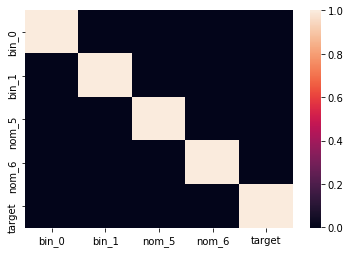

In [13]:
sns.heatmap(train_AdversarialValidation.loc[:, ['bin_0', 'bin_1', 'nom_5', 'nom_6', 'target']].corr())
plt.show()


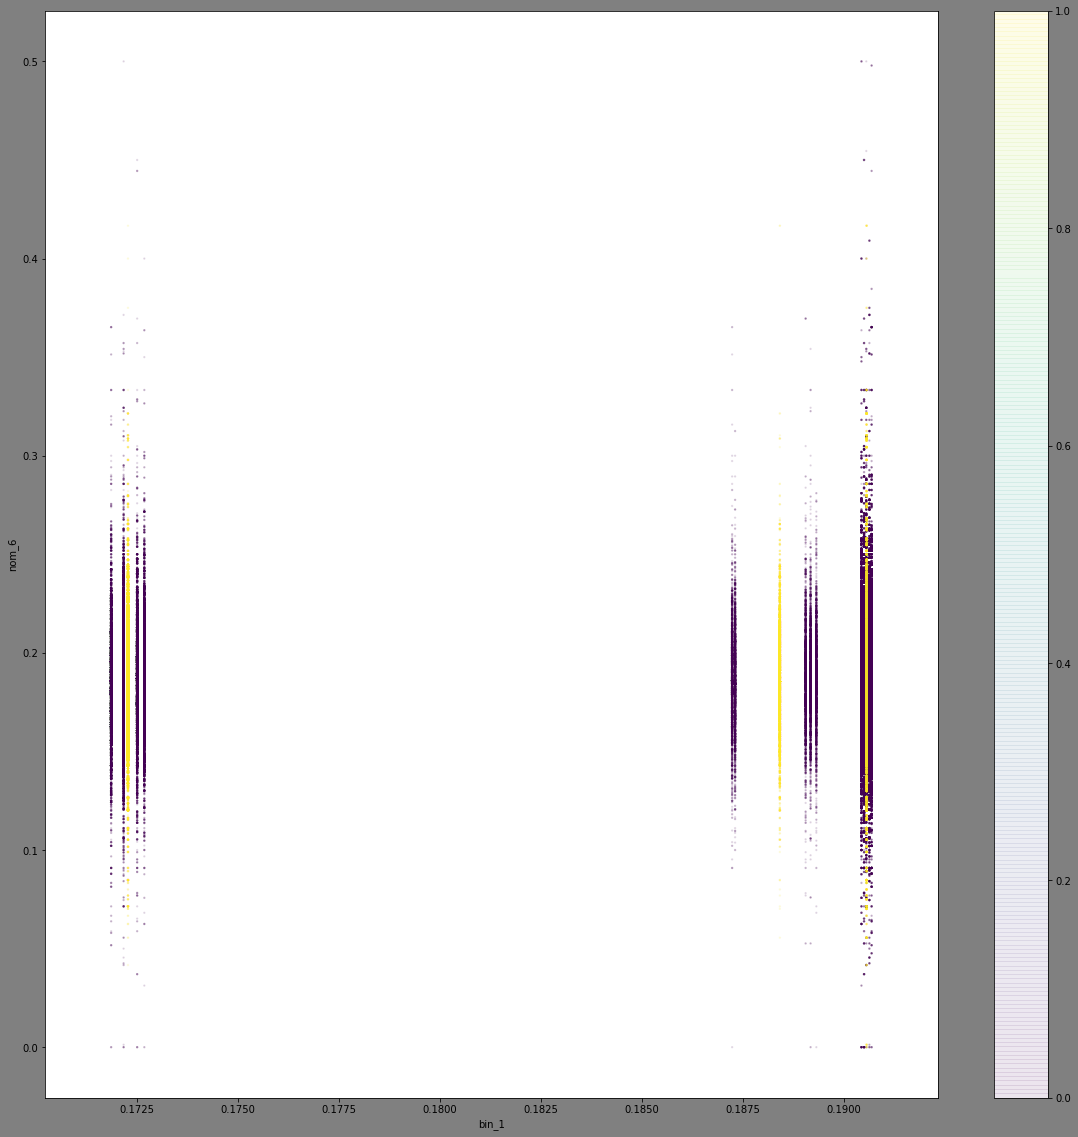

In [9]:
plt.figure(figsize=(20, 20), facecolor='gray')
plt.scatter(
    x=train_AdversarialValidation['bin_1'], 
    y=train_AdversarialValidation['nom_6'], 
    s=2,
    c=np.array(train_AdversarialValidation['target']),
    alpha=0.1,  # 透明度
)
plt.xlabel('bin_1')
plt.ylabel('nom_6')
plt.colorbar()
plt.show()

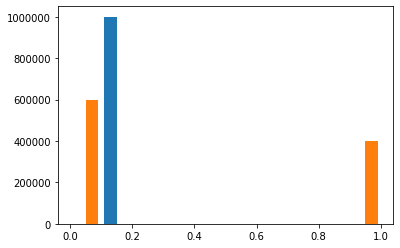

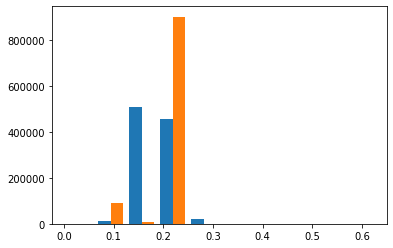

In [26]:
plt.hist([train_AdversarialValidation['bin_0'], train_AdversarialValidation['target']])
plt.show()

plt.hist([train_AdversarialValidation['nom_5'], train_AdversarialValidation['bin_0']])
plt.show()

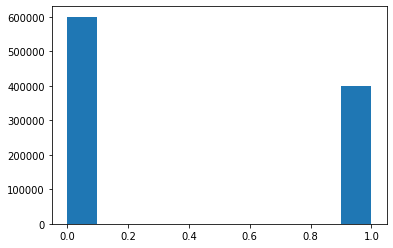

In [27]:
plt.hist([train_AdversarialValidation['target']])
plt.show()

